In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams["figure.figsize"] = (9,6)

# How do we model Time Series? Part I 

The model is the following: $X_t = X_{t-1} + Z_t$    
In other words the next value is nothing else but the previous value plus a noise, white noise and so on. That could be a stock price.

Supposing we start at $X_0 = 0$, so $X_1 = Z1$ --> $X_t = \sum^t_{i=1}Z_i$. As you go in the random walk you accumulate noises.

If we look at the expectations of $X_t$: $E[X_t] = \sum_{i=1}^tE[Z_i] = \mu_t$ and $Var[X_t] = \sum_{i=1}^tVar[Zi] = \sigma^2t$

In [2]:
# Simulating random walk
# Define a random seed to make our array reproducible
np.random.seed(32)
# we generate an array with zeros
x = np.zeros(1000)
# and then we simulate the random walk 
for i in range(1, 1000):
    x[i] = x[i-1] + np.random.normal() 


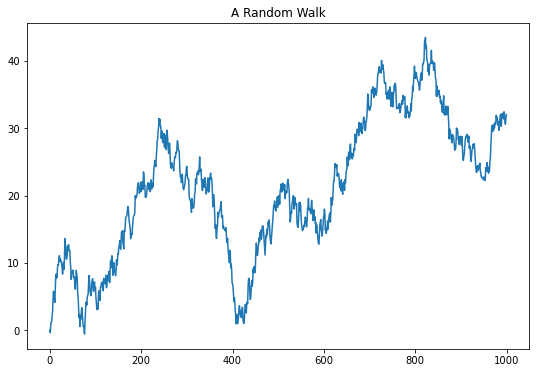

In [3]:
plt.plot(x)
plt.title('A Random Walk');

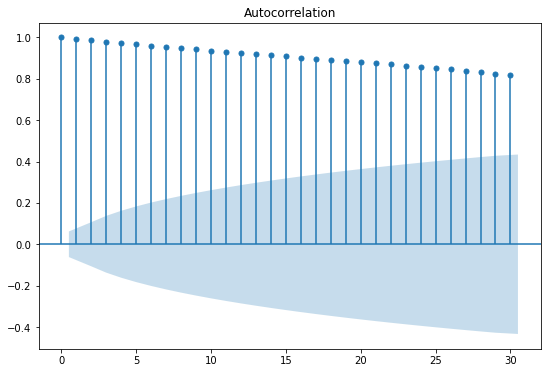

In [4]:
xplot = plot_acf(x, lags=30)

As we can see there is a high correlation even 30 lags back and a trend.So our array is definetely not stationary. However,It is possible to get rid of the trends just by substracting $X_{t-1}$ from $X_t$: $\Delta X_t = X_t - X_{t-1} \equiv Z_t$, the random noise. And so we obtain a new stationary time serie.

In [5]:
zt = np.diff(x)
len(zt)

999

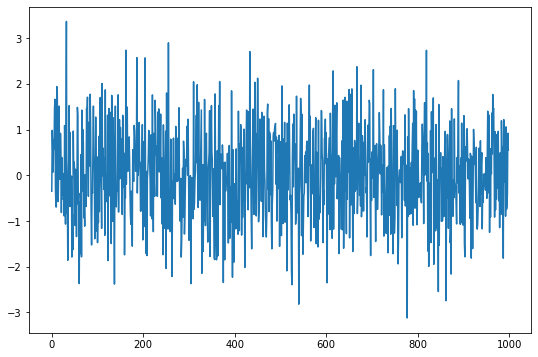

In [6]:
# let's plot zt
plt.plot(zt);

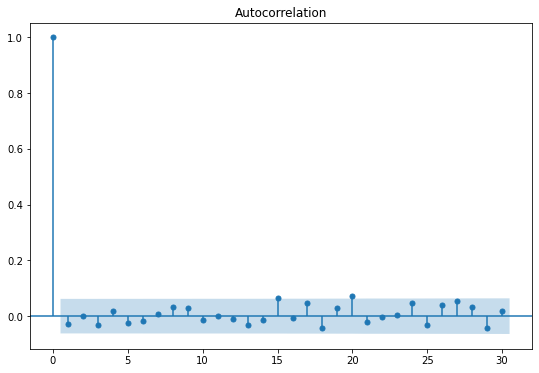

In [7]:
# Let's check the autocorrelation
zplot = plot_acf(zt, lags=30)

This is an acf of a purely random process!